In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 1: Biggest predictor of CO2 output




In [7]:
# Reading in Data
emissions_df = 'annual-co2-emissions-per-country.csv'
capita_df = 'co-emissions-per-capita.csv'
gdp_df = 'gdp-per-capita-maddison-2020.csv'
energy_df = 'per-capita-energy-source-stacked.csv'
land_use_df = 'global-co2-fossil-plus-land-use.csv'
cars_per1000_df = 'road-motor-vehicle-ownership-per-1000-people-2014.csv'
cost_df = 'levelized-cost-of-energy.csv'
food_foot_print_df = 'food-footprints.csv'

In [8]:
emissions = pd.read_csv(emissions_df)
capita = pd.read_csv(capita_df)
gdp = pd.read_csv(gdp_df)
energy = pd.read_csv(energy_df)
cars = pd.read_csv(cars_per1000_df)
cost = pd.read_csv(cost_df)
land_use = pd.read_csv(land_use_df)
food_print = pd.read_csv(food_foot_print_df)



In [9]:
# Merging Data
# Based on the overlapping column is the choosen datasets
emissions_capita = pd.merge(emissions, capita, on=['Entity', 'Code', 'Year'])
emissions_capita_gdp = pd.merge(emissions_capita, gdp, on=['Entity', 'Code', 'Year'])
energy_cars = pd.merge(energy, cars, on=['Entity', 'Code', 'Year'])

emissions_capita_gdp.drop(columns = ["417485-annotations", "Code"], inplace = True)
energy_cars.drop(columns = 'Code', inplace = True)


# Year 2010 is choosen because its the most complete dataset for land use and food production
land_use_food = pd.merge(food_print, land_use, on=[ 'Year'])
land_use_food.drop(columns=['Entity_y','Entity_x', 'Code_x', 'Code_y'], inplace=True)


new_land_use_df=land_use_food[land_use_food['Year'].astype(str).str.contains('2010')]



In [10]:
## Year 2014 is choosen because its the most complete dataset
df = pd.merge(emissions_capita_gdp, energy_cars, on=['Entity', 'Year'])
new_df= df[df['Year'].astype(str).str.contains('2014')]

new_df.columns = ['Country', 'Year', 'Annual_co2', 'Annual_co2_per_cap', 'GDP_per_cap', 'Fossil_per_cap', 'Nuclear_per_cap', 'Renewable_per_cap', 'Cars_per_1000']

In [11]:
new_df

,Country,Year,Annual_co2,Annual_co2_per_cap,GDP_per_cap,Fossil_per_cap,Nuclear_per_cap,Renewable_per_cap,Cars_per_1000
0,Algeria,2014,1.512828e+08,3.903047,13744.0,15027.486328,0.000000,17.678438,114
1,Argentina,2014,1.883965e+08,4.399314,19183.0,20108.048828,336.192535,2536.880859,314
2,Australia,2014,3.939529e+08,16.785683,47867.0,62277.480469,0.000000,3960.939941,717
3,Austria,2014,6.416000e+07,7.507548,41338.0,29037.287109,0.000000,16791.980469,578
4,Azerbaijan,2014,3.434843e+07,3.525852,17439.0,16081.031250,NaN,401.112335,101
...,...,...,...,...,...,...,...,...,...
74,United Kingdom,2014,4.388071e+08,6.774484,36436.0,28730.859375,2533.077881,3045.734131,519
75,United States,2014,5.528871e+09,17.168596,51664.0,68806.257812,6845.298340,5924.801758,797
76,Uzbekistan,2014,1.073995e+08,3.527477,9085.0,17980.089844,NaN,550.699280,37
77,Venezuela,2014,1.759613e+08,5.827834,20317.0,25457.541016,0.000000,7256.701660,147


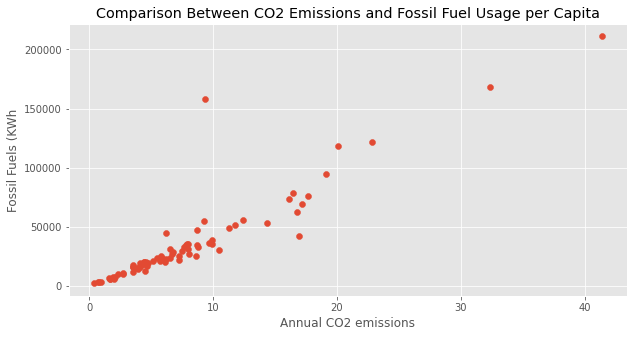

In [12]:
plt.style.use('ggplot')

x = new_df.iloc[:, 3]
y =  new_df.iloc[:, -4]

# Emission vs Fossil Fuels
plt.figure(figsize=(10,5))
plt.scatter(x,y)
plt.ylabel("Fossil Fuels (KWh")
plt.xlabel("Annual CO2 emissions")
plt.title("Comparison Between CO2 Emissions and Fossil Fuel Usage per Capita")
plt.show()

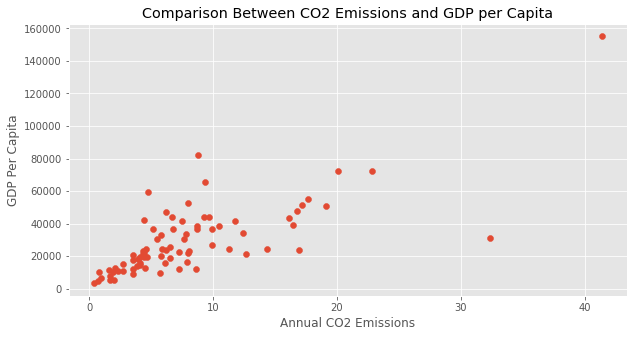

In [13]:
# Creating figure
x = new_df.iloc[:, 3]
y = new_df.iloc[:, 4]

plt.figure(figsize=(10,5))
plt.scatter(x,y)

plt.ylabel("GDP Per Capita")
plt.xlabel("Annual CO2 Emissions")
plt.title("Comparison Between CO2 Emissions and GDP per Capita")
plt.show()

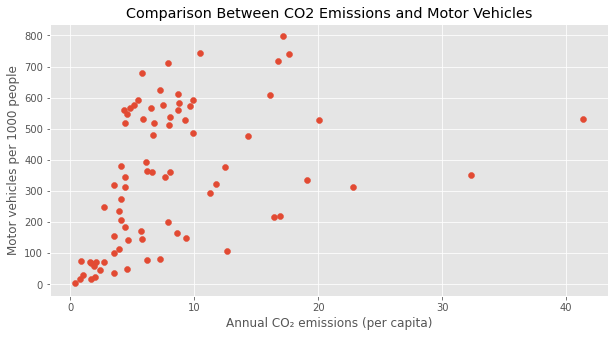

In [14]:
# Creating figure
x = new_df.iloc[:, 3]
y= new_df.iloc[:, -1]

plt.figure(figsize=(10,5))
plt.scatter(x,y)

plt.ylabel("Motor vehicles per 1000 people")
plt.xlabel("Annual CO₂ emissions (per capita)")
plt.title("Comparison Between CO2 Emissions and Motor Vehicles")
plt.show()

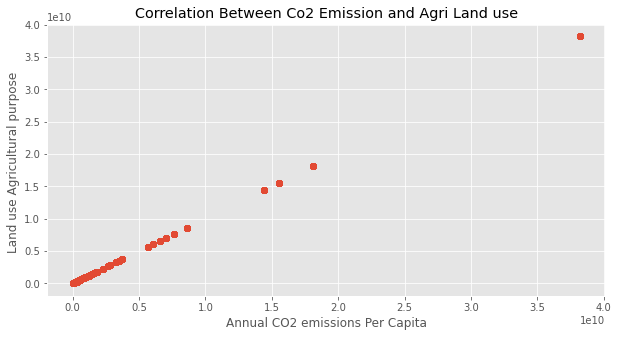

In [37]:
# Creating figure
x = new_land_use_df.iloc[:, -2]
y = new_land_use_df.iloc[:, 3]




plt.figure(figsize=(10,5))
plt.scatter(x,y)

plt.ylabel("Land use Agricultural purpose ")
plt.xlabel("Annual CO2 emissions Per Capita")
plt.title("Correlation Between Co2 Emission and Agri Land use")
plt.show()

 In the above shown figure you can see a clear correlation between Emission and use of land for agricultural purposes. Which means that as we see now a days in the news all over the world that farming (Argiculture) is also a big cause of Co2 Emission.

In [25]:
# food_print.drop(columns='Code', inplace=True)
food_print.columns = ['Food', 'Year', 'Emission']

In [26]:
food_print
# Top 10 Most emission from food sources
most_food_emission = food_print.sort_values(['Emission'], ascending=False)
most_food_emission.head(10)

,Food,Year,Emission
3,Beef (beef herd),2010,99.48
13,Dark Chocolate,2010,46.65
17,Lamb & Mutton,2010,39.72
4,Beef (dairy herd),2010,33.30
12,Coffee,2010,28.53
30,Prawns (farmed),2010,26.87
10,Cheese,2010,23.88
15,Fish (farmed),2010,13.63
27,Pig Meat,2010,12.31
29,Poultry Meat,2010,9.87


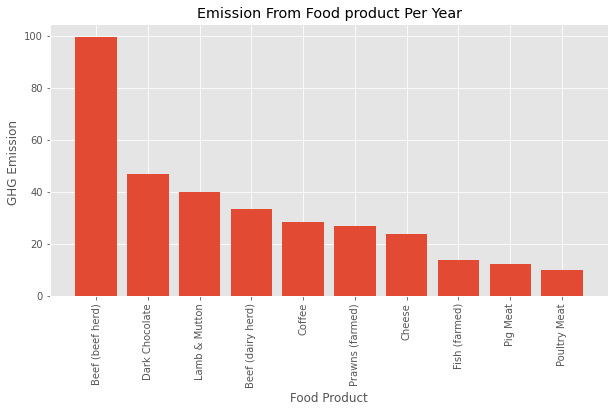

In [27]:
# Creating figure
x = most_food_emission.iloc[0:10,0]
y = most_food_emission.iloc[0:10,-1]

plt.figure(figsize=(10,5))
plt.bar(x,y)
plt.xlabel("Food Product")

plt.ylabel('GHG Emission ')
plt.xticks(rotation = 90)
plt.title("Emission From Food product Per Year")
plt.show()

In combination with the previous Chart and the above one, we can see that Most emission of argicultural purpose comes form cattle (beef Herd). 

# 2: Biggest strides in decreasing CO2 output


In [28]:
output_df = emissions.pivot(index='Entity', columns='Year', values='Annual CO₂ emissions')
capita_output_df =  capita.pivot(index='Entity', columns='Year', values='Annual CO₂ emissions (per capita)')

# Select only last 30 years
output_df = output_df.drop(columns = output_df.columns[:-31])
capita_output_df = capita_output_df.drop(columns = capita_output_df.columns[:-31])

# Relative change between 1991 and 2021
output_df['change'] = (output_df.loc[:, 2021] - output_df.loc[:, 1991])
output_df['relative'] = (output_df.loc[:, 'change'] / output_df.loc[:, 1991]) * 100

capita_output_df['change'] = (capita_output_df.loc[:, 2021] - capita_output_df.loc[:, 1991])
capita_output_df['relative'] = (capita_output_df.loc[:, 'change'] / capita_output_df.loc[:, 1991]) * 100

# Sort from big to small 
big_change = output_df.sort_values("relative")
capita_big_change = capita_output_df.sort_values("relative")

# big_change['country'] = big_change.index
capita_big_change['country'] = capita_big_change.index


capita_big_change.sort_values("relative").head()

Year,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2015,2016,2017,2018,2019,2020,2021,change,relative,country
Entity,,,,,,,,,,,,,,,,,,,,,
Kuwait,367.927920,18.294262,29.709675,33.651417,32.980118,29.303770,31.036915,28.336819,28.668217,27.590618,...,23.651518,25.171660,23.258196,22.478844,23.498793,22.882670,24.972116,-342.955804,-93.212770,Kuwait
Moldova,6.576870,4.667079,3.526229,2.772321,2.556556,2.638051,1.661740,1.480139,1.088430,0.840384,...,1.459015,1.520459,1.641404,1.733205,1.765773,1.701957,1.829657,-4.747214,-72.180437,Moldova
French Guiana,6.848721,6.665894,6.828456,5.842478,5.276881,4.195408,3.765573,4.285594,3.310401,3.106944,...,2.724782,2.725494,2.624028,2.540044,2.534105,2.238595,2.189799,-4.658923,-68.026164,French Guiana
Democratic Republic of Congo,0.084222,0.073260,0.067263,0.040909,0.048598,0.052383,0.041842,0.036071,0.027896,0.018363,...,0.035505,0.024734,0.029352,0.028385,0.028980,0.026740,0.027183,-0.057039,-67.724420,Democratic Republic of Congo
Somalia,0.105097,0.105900,0.096730,0.090436,0.081695,0.076002,0.069639,0.063667,0.058558,0.055035,...,0.045787,0.044605,0.042891,0.041369,0.039893,0.034968,0.035766,-0.069331,-65.968200,Somalia


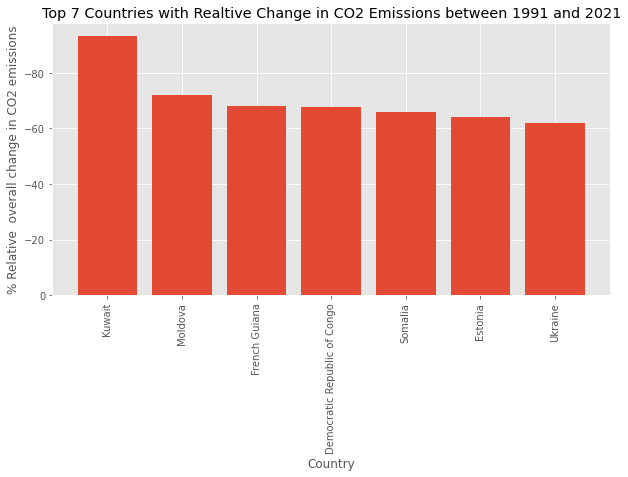

In [36]:
# Creating figure
x = capita_big_change.iloc[0:7, -1]
y = capita_big_change.iloc[0:7, -2]

plt.figure(figsize=(10,5))
plt.gca().invert_yaxis()
plt.bar(x,y)


plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("% Relative  overall change in CO2 emissions")
plt.title("Top 7 Countries with Realtive Change in CO2 Emissions between 1991 and 2021")
plt.show()

# 3: Best future price for non-fossil fuel energy


In [32]:
# cost
cost.drop(columns = 'Code', inplace = True)
cost.columns = ['Country', 'Year', 'Bioenergy', 'Geothermal', 'Offshore_wind', 'Solar_photovoltaic', 'Solar_concentrated', 'Hydropower', 'Onshore_wind']

world_cost = cost[cost['Country'].str.contains('World')]
world_cost = world_cost.dropna()

In [33]:
# Toke values to calculate regression
x = world_cost.Year
bio = world_cost.Bioenergy
geo = world_cost.Geothermal
offshorew = world_cost.Offshore_wind
solarp = world_cost.Solar_photovoltaic
solarc = world_cost.Solar_concentrated
hydro = world_cost.Hydropower
onshorew = world_cost.Onshore_wind

# Reshaping values for calculation
x = x.values.reshape(11, 1)
bio = bio.values.reshape(11, 1)
geo= geo.values.reshape(11, 1)
offwind = offshorew.values.reshape(11, 1)
solarp = solarp.values.reshape(11, 1)
solarc = solarc.values.reshape(11, 1)
hydro = hydro.values.reshape(11, 1)
onwind = onshorew.values.reshape(11, 1)




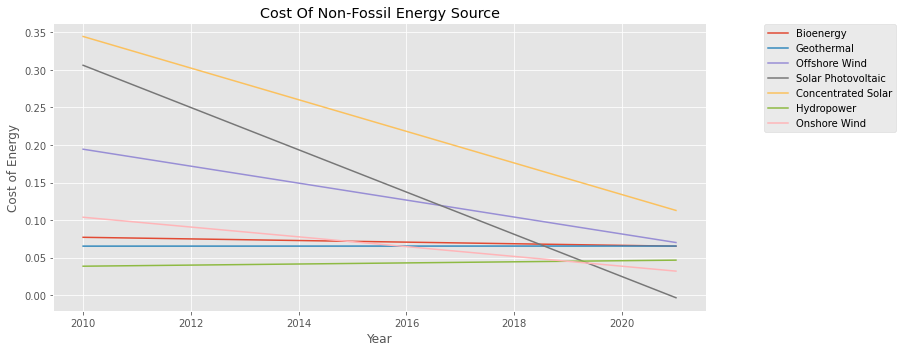

In [34]:
# Regression Types of Energy
regression = LinearRegression()
regression.fit(x, bio)

plt.figure(figsize=(10,5))

regression.fit(x, bio)
plt.plot(x, regression.predict(x) , label="Bioenergy")

regression.fit(x, geo)
plt.plot(x, regression.predict(x), label="Geothermal")

regression.fit(x, offshorew)
plt.plot(x, regression.predict(x), label="Offshore Wind")

regression.fit(x, solarp)
plt.plot(x, regression.predict(x), label="Solar Photovoltaic")

regression.fit(x, solarc)
plt.plot(x, regression.predict(x), label="Concentrated Solar")

regression.fit(x, hydro)
plt.plot(x, regression.predict(x), label="Hydropower")

regression.fit(x, onshorew)
plt.plot(x, regression.predict(x), label="Onshore Wind")

# Creating figure
plt.ylabel("Cost of Energy")
plt.xlabel("Year")
plt.title("Cost Of Non-Fossil Energy Source")
plt.tight_layout()
plt.legend(loc='right', bbox_to_anchor=(1.3, 0.81))


Based on the graph above Solar Photocoltaic Energy is the most affordable non fossil fuel source for the future. This does not say that this cannot  change. But based on this data set see a strong decreasing cost price towards the future. 